<a href="https://colab.research.google.com/github/Tlen33/Autoencoders/blob/main/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Загрузка библиотек

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, LSTM, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.preprocessing import image
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import time, random
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
# Подключаем google диск

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Функция создания базового автокодировщика

def baseAutoencoder(shape=(112,80,1)):
    img_input = Input((shape))

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    z = MaxPooling2D()(x)
    
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(shape[-1], (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error')

    return model

In [ ]:
# Функция для вывода изображений как картинок

def plotImages(xTrain, pred, shape=(112, 80)):
  n = 10
  plt.figure(figsize=(14, 7))
  for i in range(n):
      index = np.random.randint(0, pred.shape[0])
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(xTrain[index].reshape(shape))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(pred[index].reshape(shape))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
# Функция для расчета mse

def getMSE(x1, x2):
  x1 = x1.flatten()
  x2 = x2.flatten()
  delta = x1 - x2
  return sum(delta ** 2) / len(delta)

In [ ]:
# Загрузка данных с разбивкой на train/test

(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()
train_mask = np.isin(yTrainMnist, [5])
test_mask = np.isin(yTestMnist, [5])
xTrainMnist, yTrainMnist = xTrainMnist[train_mask], yTrainMnist[train_mask]
xTestMnist, yTestMnist = xTestMnist[test_mask], yTestMnist[test_mask]
xTrainMnist = xTrainMnist.astype('float32')/255
xTrainMnist = xTrainMnist.reshape(-1, 28, 28, 1)
xTestMnist = xTestMnist.astype('float32')/255
xTestMnist = xTestMnist.reshape(-1, 28, 28, 1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Автокодировщик

modelAutoMnist = baseAutoencoder((28,28,1))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Обучаем автокодировщик

history = modelAutoMnist.fit(xTrainMnist, xTrainMnist, epochs=100, batch_size=256, validation_data = (xTestMnist, xTestMnist))

Epoch 1/100
22/22 [==============================] - 5s 136ms/step - loss: 0.2361 - val_loss: 0.2135
Epoch 2/100
22/22 [==============================] - 2s 87ms/step - loss: 0.1517 - val_loss: 0.1796
Epoch 3/100
22/22 [==============================] - 2s 87ms/step - loss: 0.1067 - val_loss: 0.1440
Epoch 4/100
22/22 [==============================] - 2s 85ms/step - loss: 0.0817 - val_loss: 0.1218
Epoch 5/100
22/22 [==============================] - 2s 84ms/step - loss: 0.0652 - val_loss: 0.1090
Epoch 6/100
22/22 [==============================] - 2s 85ms/step - loss: 0.0534 - val_loss: 0.1026
Epoch 7/100
22/22 [==============================] - 2s 86ms/step - loss: 0.0446 - val_loss: 0.0994
Epoch 8/100
22/22 [==============================] - 2s 84ms/step - loss: 0.0379 - val_loss: 0.0976
Epoch 9/100
22/22 [==============================] - 2s 84ms/step - loss: 0.0327 - val_loss: 0.0955
Epoch 10/100
22/22 [==============================] - 2s 88ms/step - loss: 0.0287 - val_loss: 0.092

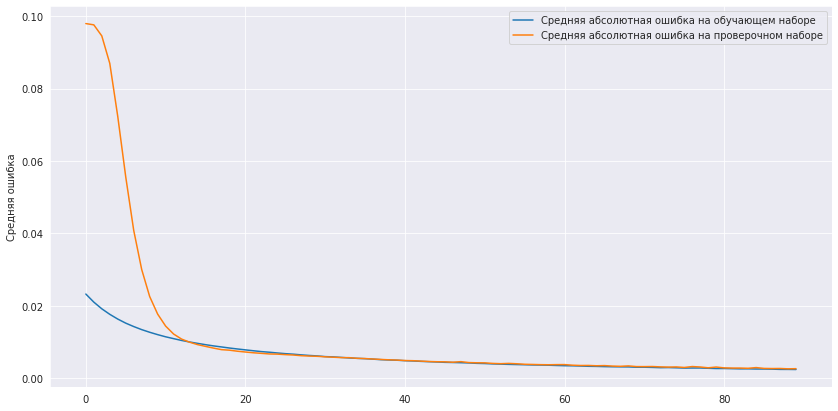

In [ ]:
# Выводим графики

plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][10:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][10:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
# Сохраняем модель на диск

modelAutoMnist.save_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelAutoMnist.h5')
modelAutoMnist.load_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelAutoMnist.h5')

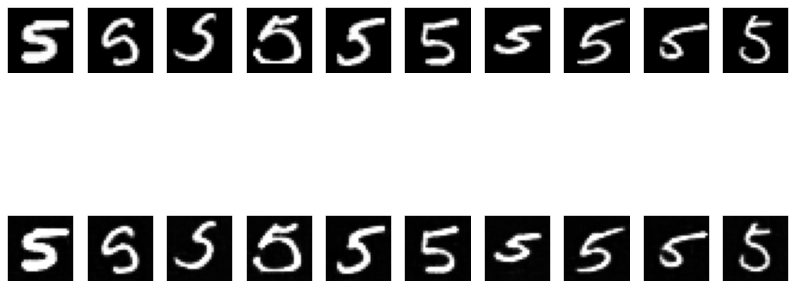

In [ ]:
# Исходные и восстановленные картинки

predMnistTest = modelAutoMnist.predict(xTestMnist)
predMnistTest = predMnistTest * 255
predMnistTest = predMnistTest.astype('uint8')
plotImages(xTestMnist, predMnistTest, shape=(28,28))

In [ ]:
# Получаем результат работы модели на обучающей и тестовой выборке

predMnistTrain = modelAutoMnist.predict(xTrainMnist)
predMnistTrain = predMnistTrain * 255
predMnistTrain = predMnistTrain.astype('uint8')
err1 = [getMSE(xTrainMnist[i], predMnistTrain[i] / 255) for i in range(len(predMnistTrain))]
err2 = [getMSE(xTestMnist[i], predMnistTest[i] / 255) for i in range(len(predMnistTest))]
print("Средняя ошибка на обучающем наборе MNIST:", sum(err1) / xTrainMnist.shape[0])
print("Средняя ошибка на тестовом наборе MNIST:", sum(err2) /xTestMnist.shape[0] )

Средняя ошибка на обучающем наборе MNIST: 0.0024146406231423103
Средняя ошибка на тестовом наборе MNIST: 0.0026239120565433594


In [ ]:
# Задание 2. Напишите 3 автокодировщика для подавления шума с собственными архитектурами.

# Зададим путь к папке, высоту и ширину избражений

images_dir = '/content/drive/MyDrive/Colab Notebooks/Базы/Лица'
img_height = 112
img_width = 80

In [ ]:
# Функция загрузки изображений

def load_images(images_dir, img_height, img_width): 
  list_images = []
  for img in os.listdir(images_dir):
    list_images.append(image.img_to_array(image.load_img(os.path.join(images_dir, img), target_size=(img_height, img_width), color_mode='grayscale')))
  return np.array(list_images)

In [ ]:
# Загрузка изображений

cur_time = time.time() 
xTrain_imag = load_images(images_dir, img_height, img_width)
print ('Время загрузки: ', round(time.time()-cur_time, 2), 'с', sep='')

Время загрузки: 2729.42с


In [ ]:
# Нормируем изображения от 0 до 1

xTrain_img = xTrain_imag/255
xTrain_img.shape

(5018, 112, 80, 1)

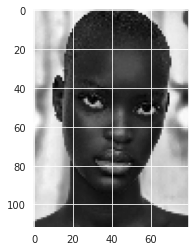

In [ ]:
# Выведем случайное изображение для проверки

plt.imshow(xTrain_img[np.random.randint(0, xTrain_img.shape[0])].reshape(112,80), cmap='gray')
plt.show()

In [ ]:
# Функция добавления шума

def addNoise(x, noiseVal):
  noise = np.random.normal(loc=0.5, scale=0.5, size=x.shape)
  
  return np.clip(x + noiseVal * noise, 0., 1.) 

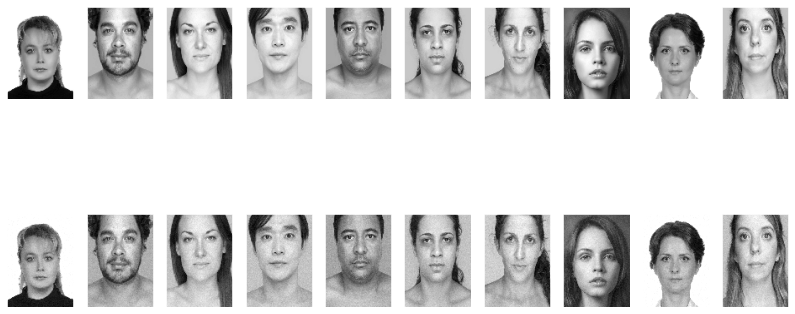

In [ ]:
# Создаем зашумленный вариант лиц

noisedXTrainFace = addNoise(xTrain_img, 0.05)
plotImages(xTrain_img, noisedXTrainFace)

In [ ]:
# Функция автокодировщика для подавления шума

def denoiseAutoencoder():
    img_input = Input((112,80,1))

    x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(img_input)
    x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Flatten()(x)
    z = Dense(256, activation='relu')(x)
    x = Dense(7*5*256, activation='relu')(z)
    x = Reshape((7,5,256))(x)
    x = Conv2DTranspose(256, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(128, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer='adam', loss='mse')

    return model

In [ ]:
# Обучаем нейронку 

modelDenoiseFace = denoiseAutoencoder()
modelDenoiseFace.fit(noisedXTrainFace[:3000], xTrain_img[:3000], epochs=100, batch_size=100, validation_data = (noisedXTrainFace[3000:], xTrain_img[3000:]))

Epoch 1/100
30/30 [==============================] - 38s 234ms/step - loss: 0.0693 - val_loss: 0.0363
Epoch 2/100
30/30 [==============================] - 6s 218ms/step - loss: 0.0372 - val_loss: 0.0254
Epoch 3/100
30/30 [==============================] - 7s 219ms/step - loss: 0.0246 - val_loss: 0.0128
Epoch 4/100
30/30 [==============================] - 7s 220ms/step - loss: 0.0182 - val_loss: 0.0106
Epoch 5/100
30/30 [==============================] - 7s 221ms/step - loss: 0.0156 - val_loss: 0.0097
Epoch 6/100
30/30 [==============================] - 7s 222ms/step - loss: 0.0139 - val_loss: 0.0089
Epoch 7/100
30/30 [==============================] - 7s 221ms/step - loss: 0.0131 - val_loss: 0.0083
Epoch 8/100
30/30 [==============================] - 7s 223ms/step - loss: 0.0119 - val_loss: 0.0078
Epoch 9/100
30/30 [==============================] - 7s 223ms/step - loss: 0.0113 - val_loss: 0.0073
Epoch 10/100
30/30 [==============================] - 7s 223ms/step - loss: 0.0106 - val_l

In [ ]:
# Сохраняем модель на диск

modelDenoiseFace.save_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelDenoiseFace.h5') # Сохраняем модель
modelDenoiseFace.load_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelDenoiseFace.h5') # Сохраняем модель

In [ ]:
# Проверяем работу Нейронки

predFaceDenoise = modelDenoiseFace.predict(noisedXTrainFace[:4000])
predFaceDenoise = predFaceDenoise * 255
predFaceDenoise = predFaceDenoise.astype('uint8')

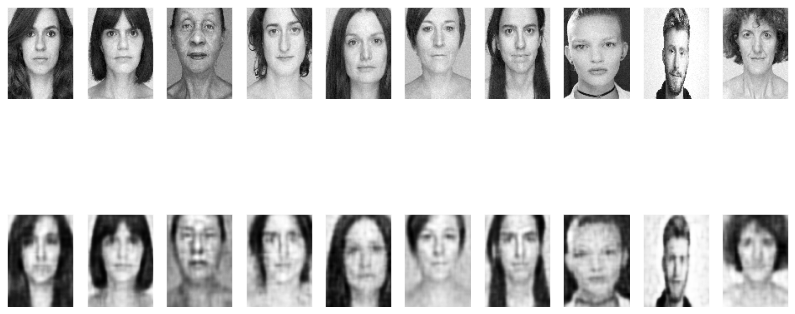

In [ ]:
plotImages(noisedXTrainFace, predFaceDenoise)

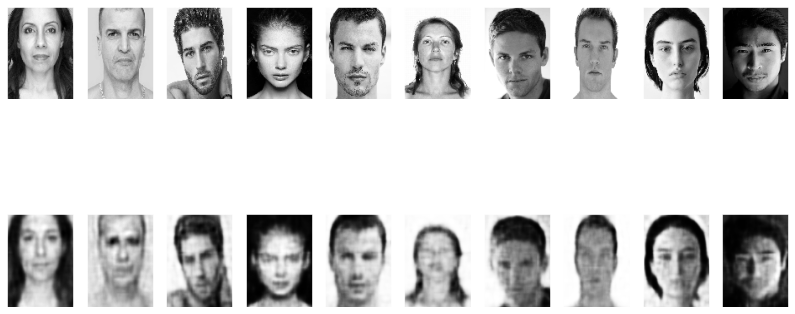

In [ ]:
plotImages(xTrain_img, predFaceDenoise)

In [ ]:
# Среднеквадратичная ошибка

errFace = [getMSE(xTrain_img[i], predFaceDenoise[i] / 255) for i in range(len(predFaceDenoise))]
print("Средняя ошибка подавления шума на Лицах:", round(sum(errFace[80:]) / len(errFace[80:]), 4))
print("Минимальная ошибка подавления шума на Лицах:", round(min(errFace),4))

Средняя ошибка подавления шума на Лицах: 0.0044
Минимальная ошибка подавления шума на Лицах: 0.0008


In [ ]:
# Функция автокодировщика для подавления шума. Своя архитектура № 1.

def denoiseAutoencoder():
    img_input = Input((112,80,1))

    x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(img_input)
    x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Flatten()(x)
    z = Dense(256, activation='relu')(x)
    x = Dense(7*5*256, activation='relu')(z)
    x = Reshape((7,5,256))(x)
    x = Conv2DTranspose(256, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(128, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer='adam', loss='mse')

    return model

In [ ]:
# Обучаем нейронку 

modelDenoiseFace1 = denoiseAutoencoder()
modelDenoiseFace1.fit(noisedXTrainFace[:3000], xTrain_img[:3000], epochs=100, batch_size=100, validation_data = (noisedXTrainFace[3000:], xTrain_img[3000:]))

Epoch 1/100
30/30 [==============================] - 8s 233ms/step - loss: 0.0515 - val_loss: 0.0410
Epoch 2/100
30/30 [==============================] - 7s 220ms/step - loss: 0.0242 - val_loss: 0.0345
Epoch 3/100
30/30 [==============================] - 7s 221ms/step - loss: 0.0184 - val_loss: 0.0294
Epoch 4/100
30/30 [==============================] - 7s 223ms/step - loss: 0.0165 - val_loss: 0.0236
Epoch 5/100
30/30 [==============================] - 7s 222ms/step - loss: 0.0144 - val_loss: 0.0196
Epoch 6/100
30/30 [==============================] - 7s 223ms/step - loss: 0.0130 - val_loss: 0.0179
Epoch 7/100
30/30 [==============================] - 7s 222ms/step - loss: 0.0127 - val_loss: 0.0142
Epoch 8/100
30/30 [==============================] - 7s 223ms/step - loss: 0.0119 - val_loss: 0.0107
Epoch 9/100
30/30 [==============================] - 7s 223ms/step - loss: 0.0109 - val_loss: 0.0125
Epoch 10/100
30/30 [==============================] - 7s 224ms/step - loss: 0.0108 - val_lo

In [ ]:
# Проверяем работу Нейронки

predFaceDenoise = modelDenoiseFace1.predict(noisedXTrainFace[:4000])
predFaceDenoise = predFaceDenoise * 255
predFaceDenoise = predFaceDenoise.astype('uint8')

In [ ]:
# Среднеквадратичная ошибка

errFace = [getMSE(xTrain_img[i], predFaceDenoise[i] / 255) for i in range(len(predFaceDenoise))]
print("Средняя ошибка подавления шума на Лицах:", round(sum(errFace[80:]) / len(errFace[80:]), 4))
print("Минимальная ошибка подавления шума на Лицах:", round(min(errFace),4))

Средняя ошибка подавления шума на Лицах: 0.0048
Минимальная ошибка подавления шума на Лицах: 0.0011


In [ ]:
# Функция автокодировщика для подавления шума. Своя архитектура № 2.

def denoiseAutoencoder():
    img_input = Input((112,80,1))

    x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(img_input)
    x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Flatten()(x)
    z = Dense(256, activation='relu')(x)
    x = Dense(7*5*256, activation='relu')(z)
    x = Reshape((7,5,256))(x)
    x = Conv2DTranspose(256, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(128, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer='adam', loss='mse')

    return model

In [ ]:
# Обучаем нейронку 

modelDenoiseFace2 = denoiseAutoencoder()
modelDenoiseFace2.fit(noisedXTrainFace[:3000], xTrain_img[:3000], epochs=100, batch_size=100, validation_data = (noisedXTrainFace[3000:], xTrain_img[3000:]))

Epoch 1/100
30/30 [==============================] - 8s 238ms/step - loss: 0.0508 - val_loss: 0.0438
Epoch 2/100
30/30 [==============================] - 7s 222ms/step - loss: 0.0263 - val_loss: 0.0367
Epoch 3/100
30/30 [==============================] - 7s 222ms/step - loss: 0.0195 - val_loss: 0.0328
Epoch 4/100
30/30 [==============================] - 7s 223ms/step - loss: 0.0170 - val_loss: 0.0260
Epoch 5/100
30/30 [==============================] - 7s 224ms/step - loss: 0.0153 - val_loss: 0.0241
Epoch 6/100
30/30 [==============================] - 7s 224ms/step - loss: 0.0141 - val_loss: 0.0199
Epoch 7/100
30/30 [==============================] - 7s 224ms/step - loss: 0.0132 - val_loss: 0.0162
Epoch 8/100
30/30 [==============================] - 7s 225ms/step - loss: 0.0125 - val_loss: 0.0155
Epoch 9/100
30/30 [==============================] - 7s 225ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 10/100
30/30 [==============================] - 7s 226ms/step - loss: 0.0111 - val_lo

In [ ]:
# Проверяем работу Нейронки

predFaceDenoise = modelDenoiseFace2.predict(noisedXTrainFace[:4000])
predFaceDenoise = predFaceDenoise * 255
predFaceDenoise = predFaceDenoise.astype('uint8')

In [ ]:
# Среднеквадратичная ошибка

errFace = [getMSE(xTrain_img[i], predFaceDenoise[i] / 255) for i in range(len(predFaceDenoise))]
print("Средняя ошибка подавления шума на Лицах:", round(sum(errFace[80:]) / len(errFace[80:]), 4))
print("Минимальная ошибка подавления шума на Лицах:", round(min(errFace),4))

Средняя ошибка подавления шума на Лицах: 0.0051
Минимальная ошибка подавления шума на Лицах: 0.0011


In [ ]:
# Функция автокодировщика для подавления шума. Своя архитектура № 3.

def denoiseAutoencoder():
    img_input = Input((112,80,1))

    x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(img_input)
    x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Flatten()(x)
    z = Dense(256, activation='relu')(x)
    x = Dense(7*5*256, activation='relu')(z)
    x = Reshape((7,5,256))(x)
    x = Conv2DTranspose(256, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(128, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x)
    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer='adam', loss='mse')

    return model

In [ ]:
# Обучаем нейронку 

modelDenoiseFace3 = denoiseAutoencoder()
modelDenoiseFace3.fit(noisedXTrainFace[:3000], xTrain_img[:3000], epochs=100, batch_size=100, validation_data = (noisedXTrainFace[3000:], xTrain_img[3000:]))

Epoch 1/100
30/30 [==============================] - 9s 244ms/step - loss: 0.0529 - val_loss: 0.0602
Epoch 2/100
30/30 [==============================] - 7s 228ms/step - loss: 0.0276 - val_loss: 0.0529
Epoch 3/100
30/30 [==============================] - 7s 228ms/step - loss: 0.0221 - val_loss: 0.0430
Epoch 4/100
30/30 [==============================] - 7s 229ms/step - loss: 0.0188 - val_loss: 0.0306
Epoch 5/100
30/30 [==============================] - 7s 229ms/step - loss: 0.0168 - val_loss: 0.0264
Epoch 6/100
30/30 [==============================] - 7s 230ms/step - loss: 0.0152 - val_loss: 0.0206
Epoch 7/100
30/30 [==============================] - 7s 231ms/step - loss: 0.0148 - val_loss: 0.0174
Epoch 8/100
30/30 [==============================] - 7s 231ms/step - loss: 0.0137 - val_loss: 0.0134
Epoch 9/100
30/30 [==============================] - 7s 232ms/step - loss: 0.0129 - val_loss: 0.0116
Epoch 10/100
30/30 [==============================] - 7s 232ms/step - loss: 0.0123 - val_lo

In [ ]:
# Проверяем работу Нейронки

predFaceDenoise = modelDenoiseFace3.predict(noisedXTrainFace[:4000])
predFaceDenoise = predFaceDenoise * 255
predFaceDenoise = predFaceDenoise.astype('uint8')

In [ ]:
# Среднеквадратичная ошибка

errFace = [getMSE(xTrain_img[i], predFaceDenoise[i] / 255) for i in range(len(predFaceDenoise))]
print("Средняя ошибка подавления шума на Лицах:", round(sum(errFace[80:]) / len(errFace[80:]), 4))
print("Минимальная ошибка подавления шума на Лицах:", round(min(errFace),4))

Средняя ошибка подавления шума на Лицах: 0.0054
Минимальная ошибка подавления шума на Лицах: 0.0012


In [ ]:
# Задание 3. Обучите автокодировщик на базе Fashion Mnist.

# Загрузим данные из fashion_mnist

(xTrainMnistF, yTrainMnistF), (xTestMnistF, yTestMnistF) = fashion_mnist.load_data()
xTrainMnistF = xTrainMnistF.astype('float32')/255
xTrainMnistF = xTrainMnistF.reshape(xTrainMnistF.shape[0], 28, 28, 1)

4431872/4422102 [==============================] - 0s 0us/step


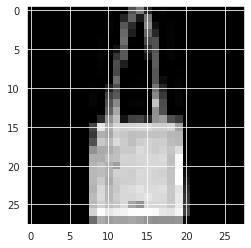

In [ ]:
# Взглянем на пример изображения из базы fashion_mnist

n = 200
plt.imshow(xTrainMnistF[n].reshape((28,28)), cmap='gray')
plt.show()

In [ ]:
# Сделаем предикт для первых ста картинок из fashion_mnist

predMnistF = modelAutoMnist.predict(xTrainMnistF)
predMnistF = predMnistF * 255
predMnistF = predMnistF.astype('uint8')

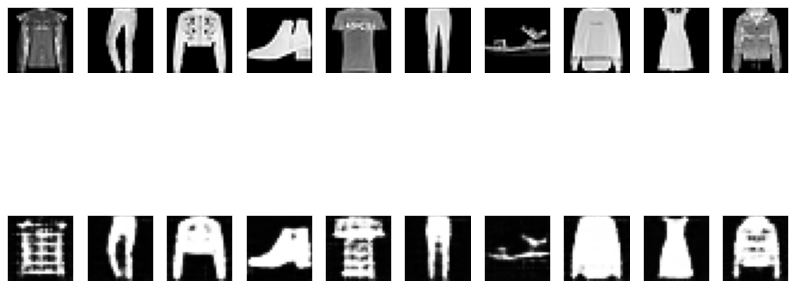

In [ ]:
# Выведем на экран картинки правильных и восстановленных изображений

plotImages(xTrainMnistF, predMnistF, shape=(28,28))